In [1]:
from smokedetectoroptimization.optimizer import optimize
from smokedetectoroptimization.smoke_source import SmokeSource
from smokedetectoroptimization.constants import SMOKE_FOLDERS, FALSE_ALARM_FOLDERS, ALARM_THRESHOLD

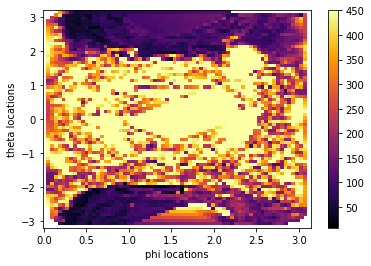

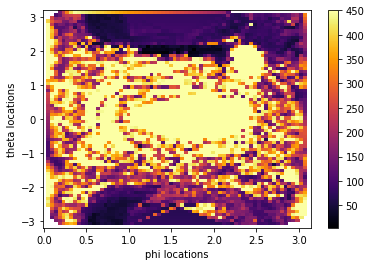

In [ ]:
PARAMETERIZATION = "phi_theta" # could be "xy", "yz", "xz"
FUNCTION_TYPE = "worst_case" # could be "fastest", "second"
INTERPOLATION_METHOD = "nearest" # could be "linear"
NUM_DETECTORS = 1
VIS = True

sources = []
for data_dir in SMOKE_FOLDERS[:2]:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
optimize(sources, num_detectors=NUM_DETECTORS, function_type=FUNCTION_TYPE, interpolation_method=INTERPOLATION_METHOD)

In [ ]:
PARAMETERIZATION = "xyz" # could be "xy", "yz", "xz" maybe "xyz"
FUNCTION_TYPE = "worst_case" # could be "fastest", "second"
INTERPOLATION_METHOD = "nearest" # could be "linear"
NUM_DETECTORS = 1

sources = []
for data_dir in SMOKE_FOLDERS[:2]:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
optimize(sources, num_detectors=NUM_DETECTORS, function_type=FUNCTION_TYPE, interpolation_method=INTERPOLATION_METHOD)